# 1- Exploration des données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

In [4]:
df = pd.read_csv('Online_Retail.csv')

In [5]:
#  InvoiceNo : le nemero de commende 
#  StockCode : le indetifire  de produit
# les relations entre les columns :
# CustomerID et InvoiceNo : chaque CustomerID peut avoir plusieurs InvoiceNo .
# StockCode et dicription : Chaque description a un StockCode
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()
# Je rencontre un problème de type de données dans la colonne InvoiceDate qui est un objet mais qui devrait être date :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()
# Je trouve les valeurs négatives dans les colonne : Quantity and UnitPrice .
# - Je suppose que c'est juste une erreur de saisie.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# cherche les valuer manquant :
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# cherche les lignes duplicatées :
df.duplicated().sum()

5268

# 2- Nettoyage des données

In [10]:
# Changer le type de InvoiceDate d'un objet en une date :
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
# Supprimer les lignes en doublon et créer un nouveau DataFrame appelé 'ndf' :
ndf = df.drop_duplicates()

In [12]:
# Transformer les valeurs négatives en valeurs positives :
for index, row in ndf.iterrows():
    
    if row.Quantity < 0 :
        ndf.loc[index, 'Quantity'] = row.Quantity * -1 
    if row.UnitPrice < 0 :
        ndf.loc[index, 'UnitPrice'] = row.UnitPrice * -1


In [13]:
ndf.describe()
# J'ai remarqué qu'il y a un 0 dans la colonne "prix unitaire" qui semble illogique :

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,11.418315,4.715110,15281.160818
std,219.043814,97.229154,1714.006089
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,11.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
ndf[ndf['UnitPrice'] == 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


#### comment gérer les valeurs manquantes ?

In [15]:
# Je vois que dans les lignes où la colonne "UnitPrice" est égale à 0,
# les colonnes "Description" et "CustomerID" ont des valeurs manquantes.
# donc Si le prix est égal à 0 je vais supprimer ces lignes :
ndf.drop(ndf[ndf['UnitPrice'] == 0].index, inplace=True)

C:\Users\amin\AppData\Local\Temp\ipykernel_10848\65557857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(ndf[ndf['UnitPrice'] == 0].index, inplace=True)


In [16]:
ndf.describe()

,Quantity,UnitPrice,CustomerID
count,534131.000000,534131.000000,401564.000000
mean,10.948591,4.737267,15281.266797
std,216.401971,97.456799,1713.978947
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.100000,15145.000000
75%,11.000000,4.130000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
ndf.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132567
Country             0
dtype: int64

In [18]:
ndf[ndf['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


# Genarate CustomersID :

In [19]:
unique_invoices_numbers = ndf[ndf['CustomerID'].isna()]['InvoiceNo'].unique()

lastIndex = ndf['CustomerID'].max()

# generate customer id for NaN :
for unique_invoice_number in unique_invoices_numbers:
    lastIndex += 1
    ndf.loc[ndf['InvoiceNo'] == unique_invoice_number, 'CustomerID'] = lastIndex

In [20]:
ndf.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

####  Comment faire face Les valeurs aberrantes ou les valeurs extrêmes ?

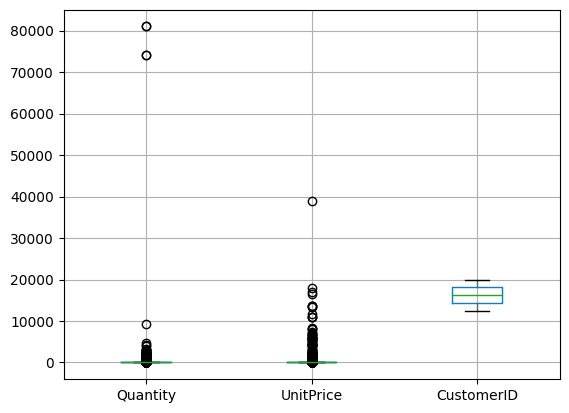

In [21]:
ndf.boxplot()
plt.show()

In [22]:
# Il est logique que la quantité soit de 70000 :
ndf[ndf['Quantity'] > 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [23]:
ndf[ndf['UnitPrice'] > 20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


In [24]:
# Je vais supprimer ces lignes car la description et le code de stock ne sont pas normaux :
ndf.drop(ndf[ndf['UnitPrice'] > 20000].index,inplace=True)

C:\Users\amin\AppData\Local\Temp\ipykernel_10848\871210821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(ndf[ndf['UnitPrice'] > 20000].index,inplace=True)


# 3 -Analyse des données

In [25]:
# J'ai créé une copie du DataFrame pour l'analyse,
# car je souhaite ajouter quelques colonnes sans affecter le DataFrame original.
Analyse_ndf = ndf

#### Quelle est la taille totale du Dataset avant et après le nettoyage des données ?

In [26]:
print(f'la taille totale du Dataset avant le nettoyage : column {df.shape[0]} , rows : {df.shape[1]}',)
print(f'la taille totale du Dataset après le nettoyage : column {ndf.shape[0]} , rows : {ndf.shape[1]}',)

la taille totale du Dataset avant le nettoyage : column 541909 , rows : 8
la taille totale du Dataset après le nettoyage : column 534130 , rows : 8


#### Quelle sont les clients qui ont passées plus de commande sur notre site ?

In [27]:
The_Top10_Client = Analyse_ndf.groupby('CustomerID')['InvoiceNo'].nunique().nlargest(10)
The_Top10_Client

CustomerID
14911.0    248
12748.0    223
17841.0    169
14606.0    128
13089.0    118
15311.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     76
Name: InvoiceNo, dtype: int64

#### Quelle est le plus haut montant dépensé par un seul client ?

In [28]:
# crée une nouvelle colonne appelée "TotalAmount" dans le DataFrame :
Analyse_ndf['TotalAmount'] = Analyse_ndf['Quantity'] * Analyse_ndf['UnitPrice']

# Je regroupe les données par "CustomerID" et je sélectionne la colonne "TotalAmount" 
# et calcule la somme des montants dépensés par chaque client.
# Enfin, je sélectionne la valeur maximale de cette somme.

total_amount_spent = Analyse_ndf.groupby(['CustomerID'])['TotalAmount'].sum().max()
total_amount_spent
print('#' * 63)
print('# le plus haut montant dépensé par un seul client :',total_amount_spent,' #')
print('#' * 63)

###############################################################
# le plus haut montant dépensé par un seul client : 336942.1  #
###############################################################


C:\Users\amin\AppData\Local\Temp\ipykernel_10848\3570257256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Analyse_ndf['TotalAmount'] = Analyse_ndf['Quantity'] * Analyse_ndf['UnitPrice']


#### Quelles est la description des produits les plus vendus ou acheté par les clients dans notre site ?

In [29]:
# Nous avons le "StockCode" qui est l'identificateur de "Description" :
# regroupe les données par le "StockCode" et calcule la somme des 'Quantity' de chaque "StockCode" 
# Sélectionnez les index des 10 produits ayant les quantités les plus élevées.

list_index_PPV = Analyse_ndf.groupby('StockCode')['Quantity'].sum().nlargest(10).index

# Trouver les descriptions basées sur l'index :
count = 0
for i in list_index_PPV :
    count +=1
    print(count,'-',Analyse_ndf[Analyse_ndf['StockCode'] == i]['Description'].unique()[0])

1 - PAPER CRAFT , LITTLE BIRDIE
2 - MEDIUM CERAMIC TOP STORAGE JAR
3 - SMALL POPCORN HOLDER
4 - WORLD WAR 2 GLIDERS ASSTD DESIGNS
5 - JUMBO BAG RED RETROSPOT
6 - WHITE HANGING HEART T-LIGHT HOLDER
7 - PACK OF 72 RETROSPOT CAKE CASES
8 - ASSORTED COLOUR BIRD ORNAMENT
9 - RABBIT NIGHT LIGHT
10 - MINI PAINT SET VINTAGE


#### Quel est le nombre moyen de produits vendus par jour, mois ?

In [30]:
# moyen de produits vendus par jour :

# Regroupez les données par "InvoiceDate" en effectuant un regroupement par jour.
# Ensuite, calculez la somme de la colonne "Quantity" pour chaque jour et calculez la moyenne de ces sommes.

MVP_jour = Analyse_ndf.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Quantity'].sum().mean()
print('Le Moyane De Preduits vondus par jour : ',MVP_jour)

Le Moyane De Preduits vondus par jour :  15636.312834224598


In [31]:
# moyen de produits vendus par mois :
MVP_mois = Analyse_ndf.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum().mean()
MVP_mois 
print('Le Moyane De Preduits vondus par Mois : ',MVP_mois)

Le Moyane De Preduits vondus par Mois :  449844.6923076923


#### Quelle est la répartition géographique des ventes ?

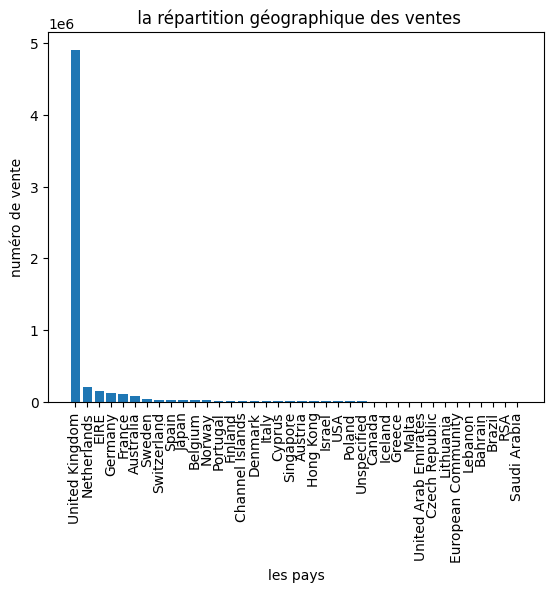

In [32]:
# Je regroupe les données par "Country" et calcule la somme de la colonne "Quantity" pour chaque pays,
# puis les classe du plus grand au plus petit.

répartition_géographique = Analyse_ndf.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

plt.bar(répartition_géographique.index, répartition_géographique.values)
# Add labels and title :
plt.xlabel('les pays')
plt.ylabel('numéro de vente')
plt.title(' la répartition géographique des ventes')
plt.xticks(rotation=90)

# Display the graph :
plt.show()

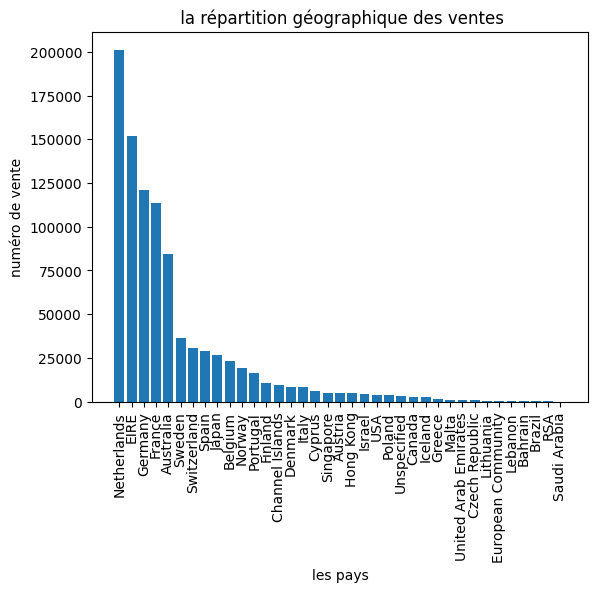

In [33]:
# show the contry without united kingdom :
New_répartition_géographique = répartition_géographique.drop('United Kingdom')

plt.bar(New_répartition_géographique.index, New_répartition_géographique.values)
# Add labels and title
plt.xlabel('les pays')
plt.ylabel('numéro de vente')
plt.title(' la répartition géographique des ventes')
plt.xticks(rotation=90)

# Display the graph :
plt.show()

#### Quelle est la tendance des ventes au fil du temps, tracer un graphique de la croissance des ventes ?

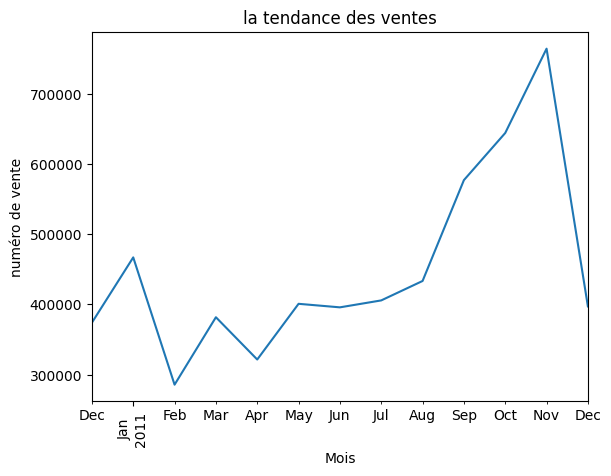

In [34]:
# Regroupez les données par "InvoiceDate" en effectuant un regroupement par mois.
# Ensuite, calculez la somme de la colonne "Quantity" pour chaque mois : 

vent_per_mois = Analyse_ndf.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()

# voila le graph :
vent_per_mois.plot()

# Add labels and title
plt.xlabel('Mois')
plt.ylabel('numéro de vente')
plt.title('la tendance des ventes')
plt.xticks(rotation=90)

# Display the graph :
plt.show()

#### Quel est le chiffre d'affaires total réalisé par le site de vente en ligne sur une période donnée (par exemple année 2011)?

In [35]:
# Regroupez les données par "InvoiceDate" en effectuant un regroupement par lanner 2011 
# et calculez la somme de la colonne "TotalAmount" .

le_chifre_totale2011 = Analyse_ndf[Analyse_ndf['InvoiceDate'].dt.year == 2011]['TotalAmount'].sum()
print('#'*55)
print('# Le chiffre total de l\'année :','{:,.2f}'.format(le_chifre_totale2011),'#')
print('#'*55)

#######################################################
# Le chiffre total de l'année : 10,623,062.80 #
#######################################################


#### Quels sont les moments du jour (matin, après-midi, soir) que les clients achètent le plus ?

In [36]:
# crée une nouvelle colonne appelée "période" :
Analyse_ndf['période'] = ''

# Ces lignes créent une condition qui est vraie (True) pour les heures du matin, de l'après-midi et du soir : 
matin_condition = (Analyse_ndf['InvoiceDate'].dt.hour >= 1) & (Analyse_ndf['InvoiceDate'].dt.hour <= 11)
après_midi_condition = (Analyse_ndf['InvoiceDate'].dt.hour >= 12) & (Analyse_ndf['InvoiceDate'].dt.hour <= 17)
soir_condition = Analyse_ndf['InvoiceDate'].dt.hour >= 18

# Ces lignes affectent les valeurs à la colonne 'période' pour toutes les lignes qui satisfont les conditions :
Analyse_ndf.loc[matin_condition, 'période'] = 'matin'
Analyse_ndf.loc[après_midi_condition, 'période'] = 'après-midi'
Analyse_ndf.loc[soir_condition, 'période'] = 'soir'

Analyse_ndf.head(3)

C:\Users\amin\AppData\Local\Temp\ipykernel_10848\1065725562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Analyse_ndf['période'] = ''


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,période
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,matin
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,matin
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,matin


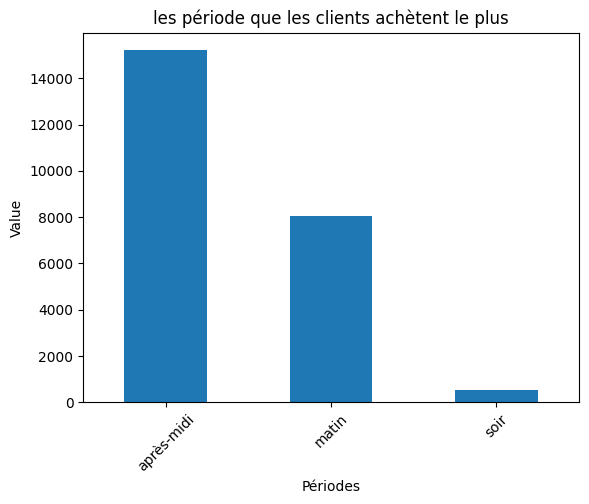

In [37]:
# le nombe de comonde dans chaque period :
# Je regroupe les données par "période" et j'utilise la fonction nunique() 
# sur la colonne "InvoiceNo" pour obtenir le nombre de factures uniques pour chaque période :

Acheter_moment = Analyse_ndf.groupby('période')['InvoiceNo'].nunique()

Acheter_moment.plot.bar()
# Add labels and title
plt.xlabel('Périodes')
plt.ylabel('Value')
plt.title('les période que les clients achètent le plus')
plt.xticks(rotation= 45)
# Display the graph
plt.show()

### Quelle est la distribution des prix des produits ?

In [41]:
# crée une nouvelle colonne appelée "disprix" :
Analyse_ndf['disprix'] = 'unkone'

# Ces lignes créent une condition qui est vraie (True) pour chaque enregistrement de la distribution. :
# Je crée ces conditions basées sur la valeur de la colonne "UnitPrice".
# Chaque condition est une expression booléenne qui vérifie une plage spécifique de valeurs pour "UnitPrice".
Condition1 = Analyse_ndf['UnitPrice'] <= 5
Condition2 = (Analyse_ndf['UnitPrice'] > 5) & (Analyse_ndf['UnitPrice'] <= 10)
Condition3 = (Analyse_ndf['UnitPrice'] > 10) & (Analyse_ndf['UnitPrice'] <= 25)
Condition4 = (Analyse_ndf['UnitPrice'] > 25) & (Analyse_ndf['UnitPrice'] <= 50)
Condition5 = (Analyse_ndf['UnitPrice'] > 50) & (Analyse_ndf['UnitPrice'] <= 100)
Condition6 = Analyse_ndf['UnitPrice'] > 100

# Ces lignes sont utilisées pour affecter des valeurs à la colonne "disprix" en fonction des conditions spécifiées :

Analyse_ndf.loc[Condition1 , 'disprix'] = '0-5'
Analyse_ndf.loc[Condition2 , 'disprix'] = '5-10'
Analyse_ndf.loc[Condition3 , 'disprix'] = '10-25'
Analyse_ndf.loc[Condition4 , 'disprix'] = '25-50'
Analyse_ndf.loc[Condition5 , 'disprix'] = '50-100'
Analyse_ndf.loc[Condition6 , 'disprix'] = '100+'

Analyse_ndf

C:\Users\amin\AppData\Local\Temp\ipykernel_10848\3338636029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Analyse_ndf['disprix'] = 'unkone'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,période,disprix
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,matin,0-5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,matin,0-5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,matin,0-5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,matin,0-5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,matin,0-5
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,après-midi,0-5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,après-midi,0-5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,après-midi,0-5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,après-midi,0-5


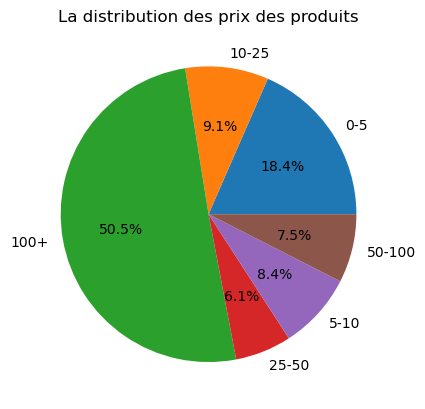

In [99]:
# Je regroupe les données par "disprix" et j'utilise la fonction nunique() sur la colonne
# "UnitPrice" pour compter le nombre unique de prix pour chaque "disprix" :

distribution_des_prix = Analyse_ndf.groupby('disprix')['UnitPrice'].nunique()

# Create A graph Pie :
plt.pie(distribution_des_prix,labels = distribution_des_prix.index,autopct='%1.1f%%')
# Add labels and title
plt.title('La distribution des prix des produits')
plt.xticks(rotation= 45) # for show the lable 
# Display the graph
plt.show()

#### Après l’insertion des données nettoyées dans la base de données SQL, Créer des requêtes afin de vérifier des informations que vous voyez utiles du Dataset.

In [45]:
# Créer un connexion dans le database :

driver = 'SQL Server'
server = 'DESKTOP-KQV9VST'
database = 'Online_Retail_DB'

conn = pyodbc.connect(f'''
                        DRIVER={driver};
                        SERVER={server};
                        DATABASE={database};
                        Trusted_Connection=yes
                       ''')
cursor = conn.cursor()
conn

In [46]:
cursor.execute('''CREATE TABLE Online_Retail(InvoiceNo varchar(20),
                StockCode varchar(25), 
                Description varchar(50),
                Quantity int ,
                InvoiceDate date,
                UnitPrice float,
                CustomerID int,
                Country varchar(20)
                )''')
conn.commit()

In [47]:
for row in Analyse_ndf.itertuples():
    cursor.execute(
        f'''
            INSERT INTO Online_Retail
            VALUES (?,?,?,?,?,?,?,?)
        ''',
            row.InvoiceNo,
            row.StockCode,
            row.Description,
            row.Quantity,
            row.InvoiceDate,
            row.UnitPrice,
            row.CustomerID,
            row.Country
    )
    conn.commit()

In [48]:
cursor.close()
conn.close()